In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
dataset_train = os.path.join(os.getcwd(), 'TRAIN')
dataset_test = os.path.join(os.getcwd(), 'TEST')

len_horse_train = len(os.listdir(os.path.join(dataset_train, 'horses')))
len_human_train = len(os.listdir(os.path.join(dataset_train, 'humans')))

print("CAVALOS: {}\nHUMANOS: {}".format(len_horse_train, len_human_train))

len_horse_test = len(os.listdir(os.path.join(dataset_test, 'horses')))
len_human_test = len(os.listdir(os.path.join(dataset_test, 'humans')))

print("CAVALOS: {}\nHUMANOS: {}".format(len_horse_test, len_human_test))

CAVALOS: 500
HUMANOS: 500
CAVALOS: 128
HUMANOS: 128


In [3]:
tam = 128
larg = 128
canais = 3
tam_canais = 255
image_size = (tam, larg)
image_shape = (128, 128, 3)

batch_size = 32
epochs = 20
learning_rate = 0.001

classification = ['CAVALO', 'HUMANOS']

In [4]:
dataset_treino = tf.keras.preprocessing.image_dataset_from_directory(dataset_train, 
                                                                     image_size=image_size, 
                                                                     batch_size=batch_size, 
                                                                     shuffle=True)

dataset_teste = tf.keras.preprocessing.image_dataset_from_directory(dataset_test, 
                                                                    image_size=image_size, 
                                                                    batch_size=batch_size, 
                                                                    shuffle=True)

Found 1000 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [5]:
dataset_final = tf.data.experimental.cardinality(dataset_teste)
dataset_test_batches = dataset_final // 4

veja = dataset_teste.take(dataset_test_batches)
dataset_teste = dataset_teste.skip(dataset_test_batches)

print("DATASET VALIDAÇAO: {}\nDATASET TESTE: {}".format(tf.data.experimental.cardinality(dataset_teste), tf.data.experimental.cardinality(veja)))

DATASET VALIDAÇAO: 6
DATASET TESTE: 2


In [6]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.axis('off')
            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(classification[labels[i]])

<Figure size 640x480 with 0 Axes>

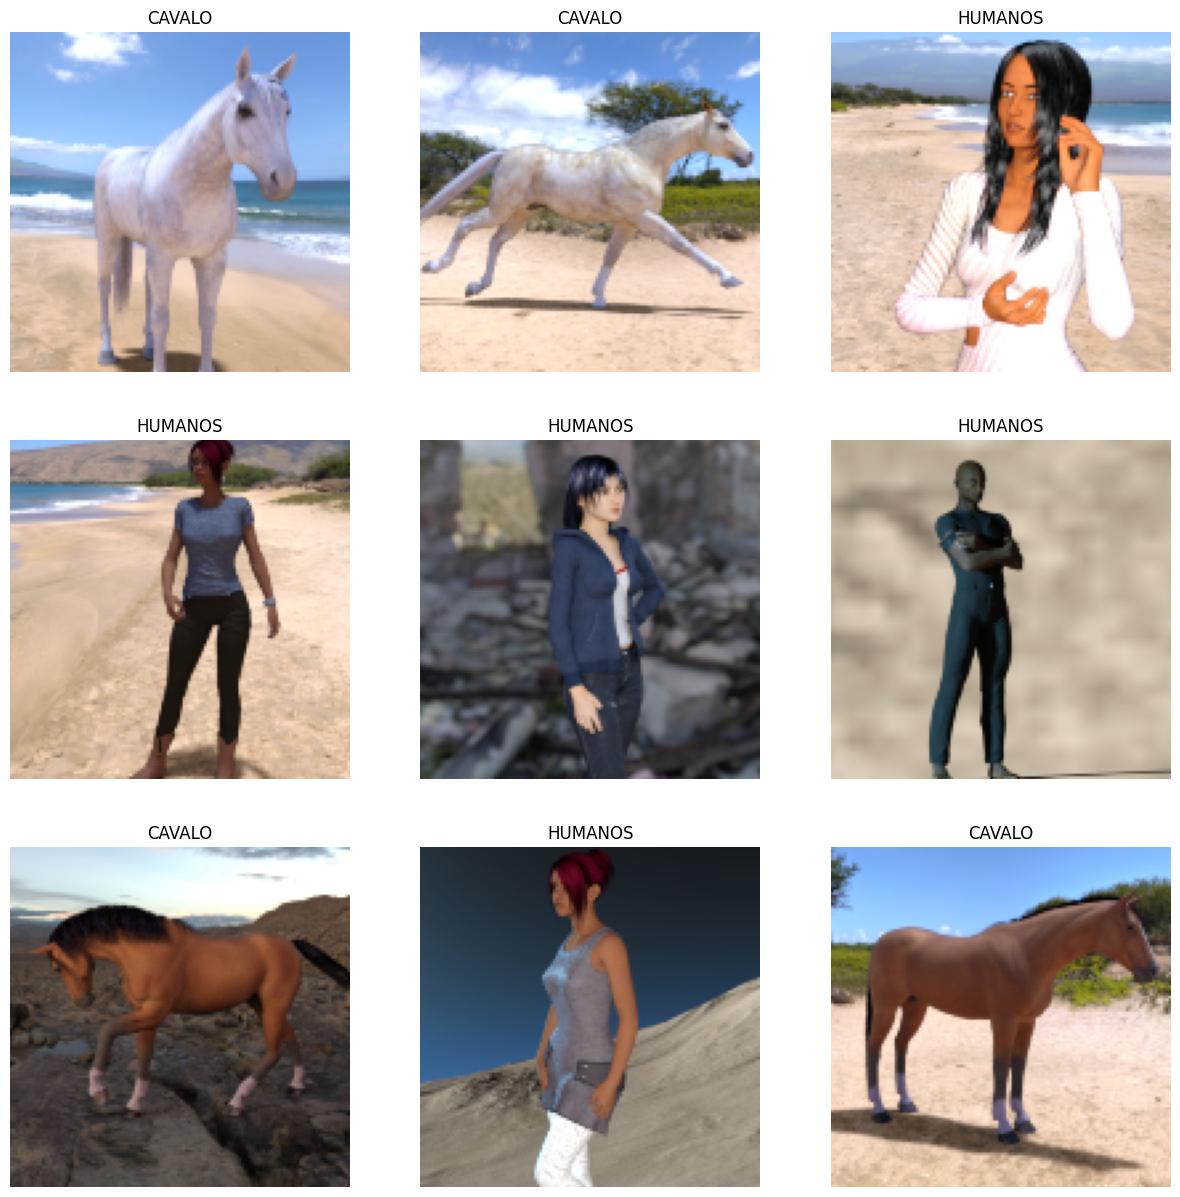

In [7]:
plot_dataset(dataset_treino)

In [8]:
data_modification = tf.keras.models.Sequential([tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2), tf.keras.layers.RandomZoom(0.2)])

def modification(dataset):
    plt.gcf().clear()
    plt.figure(figsize=(15, 15))

    for features, _ in dataset.take(1):
        feature = features[0]

        for i in range (9):
            feature_data_modification = data_modification(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i+1)
            plt.axis('off')

            plt.imshow(feature_data_modification[0] / tam_canais)


<Figure size 640x480 with 0 Axes>

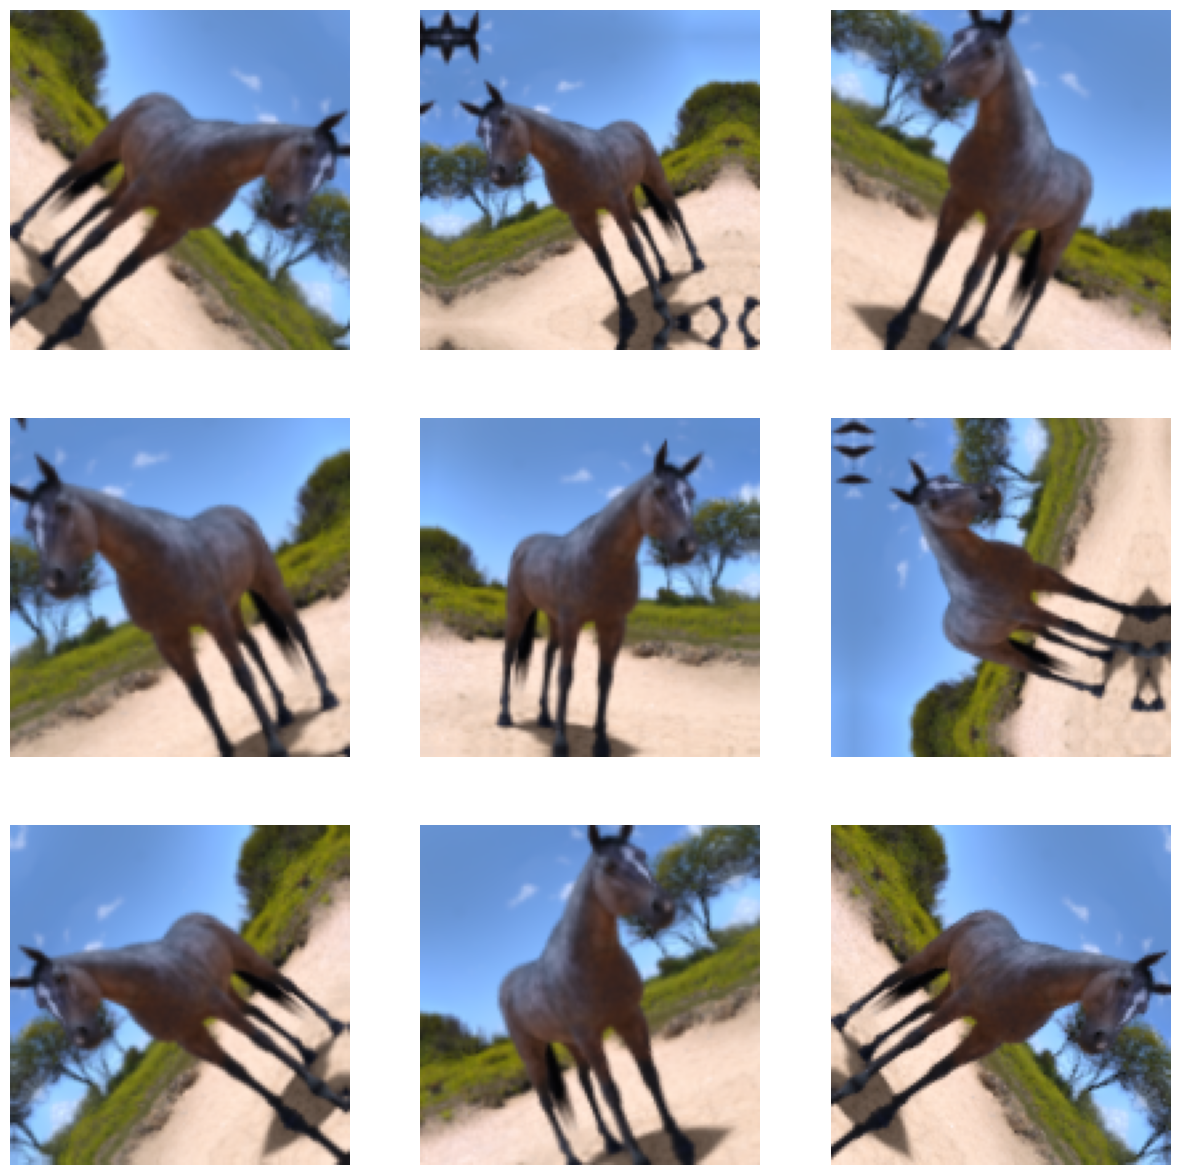

In [9]:
modification(dataset_treino)

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Rescaling(1./tam_canais, input_shape=image_shape),
                                    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(),
                                    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1, activation='sigmoid')                                    
                                    ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])
model.summary()

e:\PYTHON\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,408,257 (32.07 MB)

 Trainable params: 8,408,257 (32.07 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
treinamento = model.fit(dataset_treino, 
                        validation_data=dataset_teste, 
                        epochs=epochs)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 661ms/step - accuracy: 0.6590 - loss: 1.2142 - val_accuracy: 0.7812 - val_loss: 0.7958
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 562ms/step - accuracy: 0.9701 - loss: 0.0960 - val_accuracy: 0.7917 - val_loss: 0.8893
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 580ms/step - accuracy: 0.9928 - loss: 0.0381 - val_accuracy: 0.8438 - val_loss: 1.1620
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 579ms/step - accuracy: 0.9995 - loss: 0.0074 - val_accuracy: 0.8438 - val_loss: 1.3853
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 562ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.8385 - val_loss: 1.3867
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 604ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8229 - val_loss: 1.6572
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 597ms/step - accuracy: 1.0000 - loss: 9.0583e-04 - val_accuracy: 0.8333 - val_loss: 2.0523
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 542ms/step - accuracy: 0.9990 - loss: 0.0026 - val_

<Figure size 640x480 with 0 Axes>

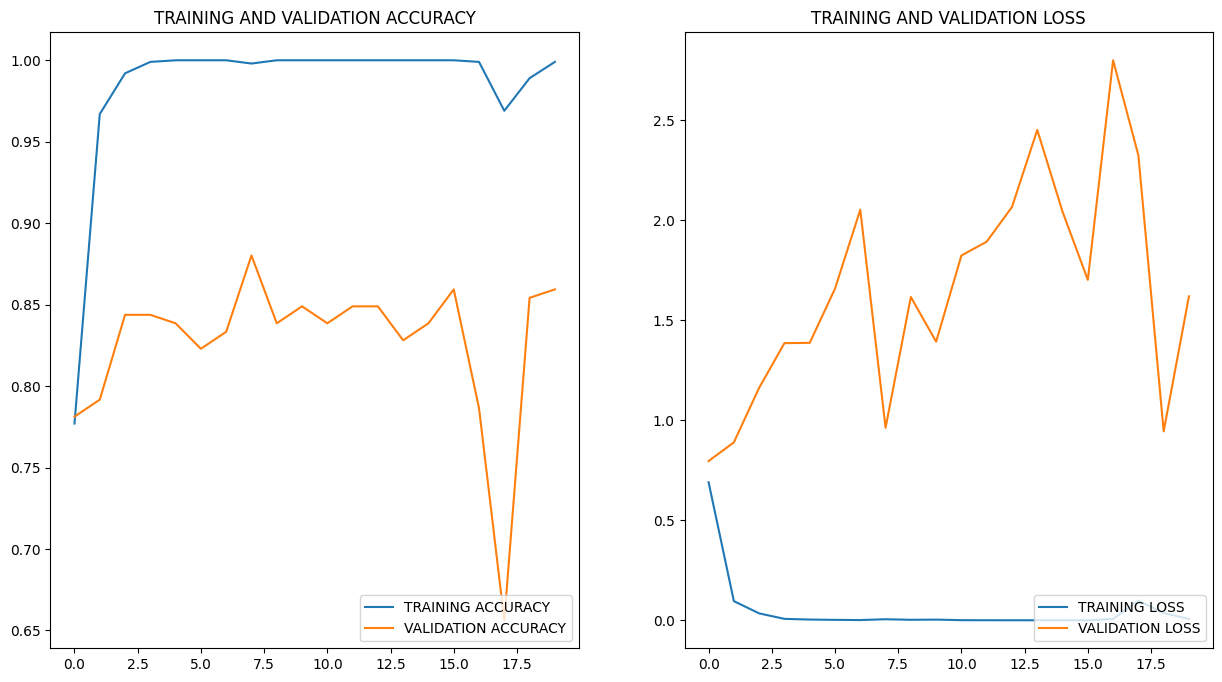

In [12]:
def plot_model():
    accuracy = treinamento.history['accuracy']
    val_accuracy = treinamento.history['val_accuracy']

    loss = treinamento.history['loss']
    val_loss = treinamento.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    plt.title('TRAINING AND VALIDATION ACCURACY')
    plt.plot(epochs_range, accuracy, label = 'TRAINING ACCURACY')
    plt.plot(epochs_range, val_accuracy, label = 'VALIDATION ACCURACY')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('TRAINING AND VALIDATION LOSS')
    plt.plot(epochs_range, loss, label = 'TRAINING LOSS')
    plt.plot(epochs_range, val_loss, label = 'VALIDATION LOSS')
    plt.legend(loc = 'lower right')

    plt.show()

plot_model()

LABELS:      [1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0]
PREDICTIONS: [1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1]


<Figure size 640x480 with 0 Axes>

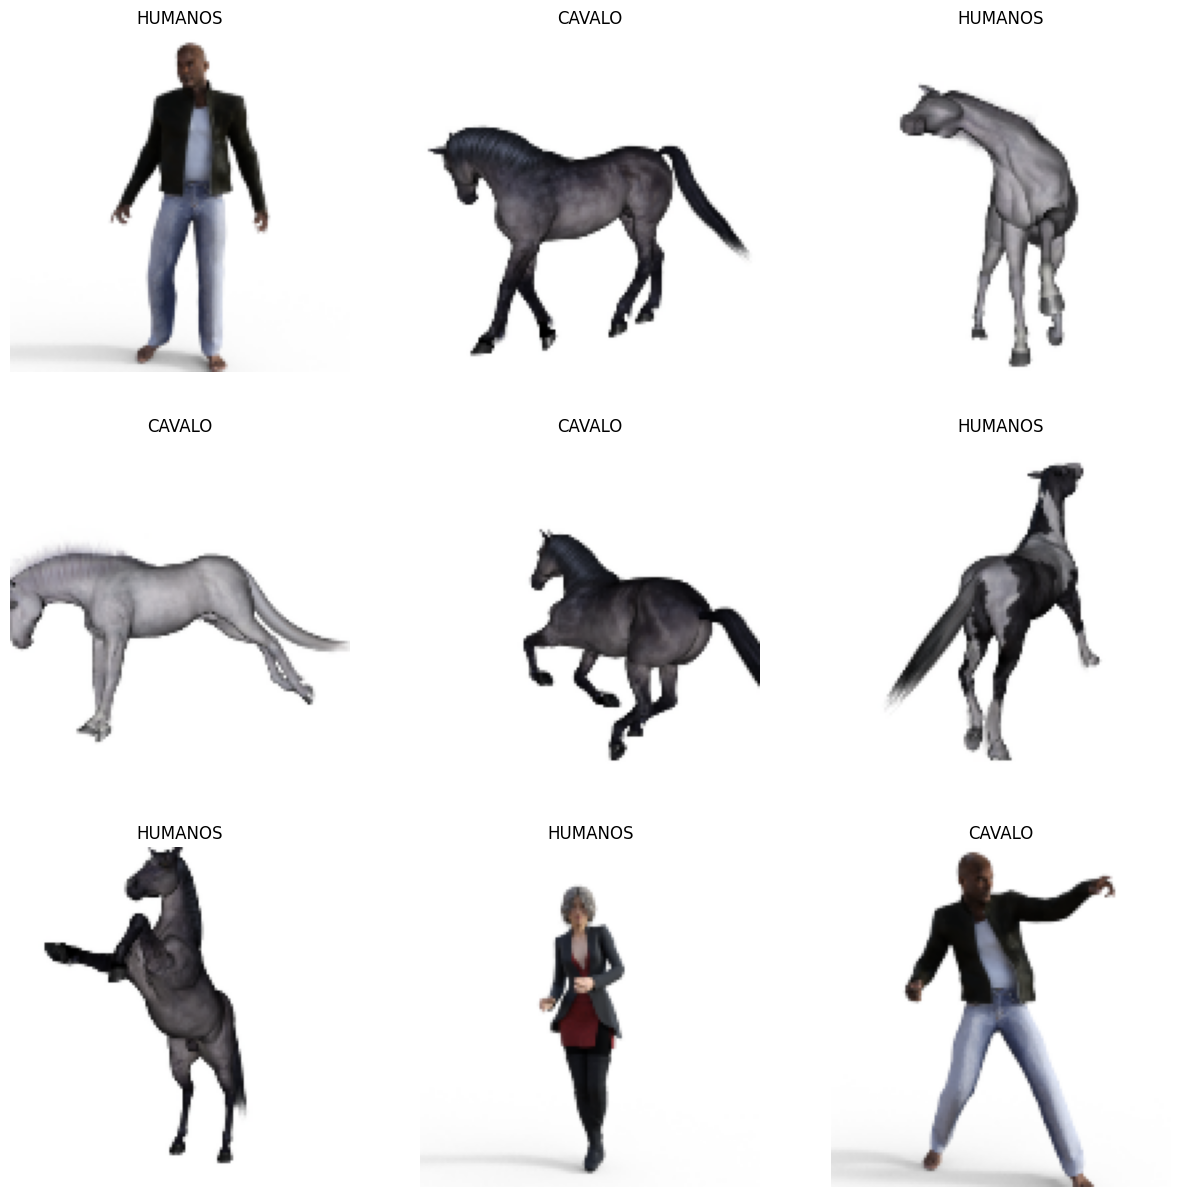

In [13]:
def plot_dataset_predictions(dataset):
    features, labels = dataset.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print("LABELS:      {}".format(labels))
    print("PREDICTIONS: {}".format(predictions.numpy()))

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(classification[predictions[i]])

plot_dataset_predictions(veja)